<a href="https://colab.research.google.com/github/VANDANA-ANDE/vandana/blob/master/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
**HAND WRITTEN DIGIT RECONGNITION USING CONVOLUTIONAL NUERAL NETWORK**


In [ ]:
!pip install tensorflow keras numpy mnist matplotlib

In [ ]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Flatten
from keras.datasets import mnist
from keras.utils import to_categorical 


In [ ]:
#load the data and split it into train and test sets
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [ ]:
#first image in the training dataset
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
#print the image label
y_train[0]

5

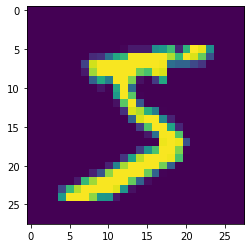

In [ ]:
#show the image as apicture
plt.imshow(x_train[0])

In [ ]:
#Reshape the data to fit the model
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [ ]:
#One-hot Encoding:
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
#build CNN model
model=Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
hist=model.fit(x_train,y_train_one_hot,
               validation_data=(x_test,y_test_one_hot),
               epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 17s 287us/step - loss: 0.2226 - accuracy: 0.9514 - val_loss: 0.0943 - val_accuracy: 0.9712
Epoch 2/3
60000/60000 [==============================] - 17s 283us/step - loss: 0.0637 - accuracy: 0.9810 - val_loss: 0.0973 - val_accuracy: 0.9732
Epoch 3/3
60000/60000 [==============================] - 17s 284us/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.0908 - val_accuracy: 0.9773


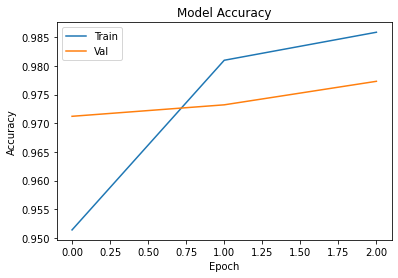

In [ ]:
#visualize model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc='upper left')
plt.show()


In [ ]:
#show predictions as probabilities for the first 4 images in the test set
predictions = model.predict(x_test[:4])
predictions

array([[2.05209773e-11, 8.04620991e-15, 2.39400860e-10, 1.17233625e-07,
        7.48820710e-13, 2.31309481e-12, 5.97163025e-18, 9.99999881e-01,
        1.30140687e-09, 3.29248415e-08],
       [2.19088201e-06, 2.02733418e-06, 9.93147314e-01, 2.04669576e-07,
        6.71038225e-11, 1.26103273e-12, 6.84800837e-03, 3.00033456e-08,
        9.44989438e-08, 1.18986667e-15],
       [4.61711988e-11, 9.99999166e-01, 5.98313719e-08, 3.49105293e-11,
        3.36522916e-08, 8.93443630e-09, 9.04640585e-10, 8.94685126e-09,
        7.25119435e-07, 2.64869748e-09],
       [9.99999762e-01, 1.36862787e-14, 1.62472336e-12, 5.59063592e-13,
        8.05638217e-13, 1.00728093e-09, 5.99852967e-09, 4.64047067e-09,
        7.64762420e-11, 2.22458425e-07]], dtype=float32)

In [ ]:
#print predictions as number labels
print(np.argmax(predictions,axis=1))
#print the actual labels
print(y_test[:4])

[7 2 1 0]
[7 2 1 0]


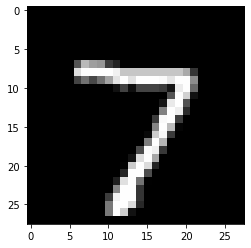

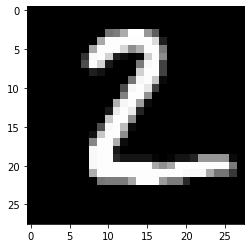

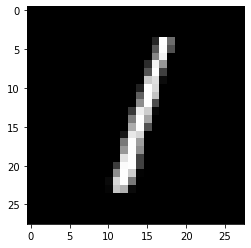

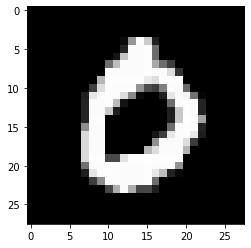

In [ ]:
#show 1st 4 images as pictures
for i in range(0,4):
  image=x_test[i]
  image=np.array(image,dtype='float')
  pixels=image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()